In [ ]:
import json
import random

import matplotlib.pyplot as plt

In [2]:
data_path = "../data/pqal_grouped_by_icd.json"
with open(data_path, "r") as f:
    icd_dict = json.load(f)

In [4]:
icd_group_range = {
    15: "FA00, FC0Z",
}

In [ ]:
def generate_random_code(group):
    start_b16, end_b16 = icd_group_range[group].split(", ")
    start_int = int(start_b16, 16)
    end_int = int(end_b16, 16)
    return random.randint(start_int, end_int)

In [21]:
import pandas as pd

# Define the column names
columns = ['Index', 'ICD_Code', 'Name']

# Read the file and parse it into a DataFrame
data = []
with open('../data/icd10cm-order-2023.txt', 'r') as file:
    for line in file:
        level = int(line[14:15].strip())
        if level != 0:
            continue
        # Split the line into columns based on fixed-width fields
        index = line[0:5].strip()
        icd_code = line[7:13].strip()
        name = line[16:75].strip()
        
        # Append the parsed data to the list
        data.append([index, icd_code, name])

# Create a DataFrame from the parsed data
df = pd.DataFrame(data, columns=columns)

# Display the DataFrame
print(df.head())

   Index ICD_Code                             Name
0  00001       00                          Cholera
1  00005       01   Typhoid and paratyphoid fevers
2  00006      010                    Typhoid fever
3  00018       02      Other salmonella infections
4  00021      022  Localized salmonella infections


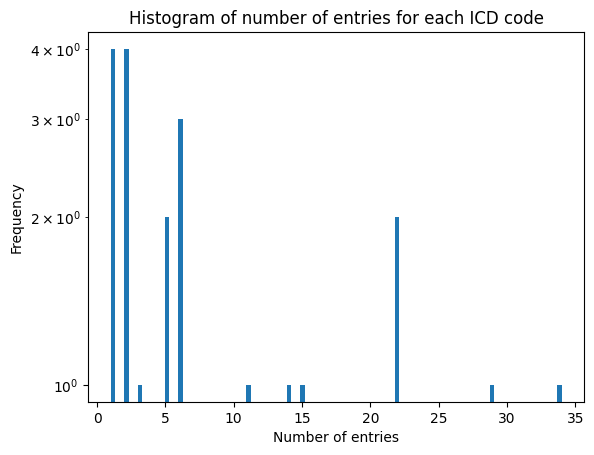

In [3]:
# count the number of entries for each ICD code
icd_count = {k: len(v) for k, v in icd_dict.items()}

# plot the histogram
plt.hist(icd_count.values(), bins=100)
plt.yscale("log")
plt.xlabel("Number of entries")
plt.ylabel("Frequency")
plt.title("Histogram of number of entries for each ICD code")
plt.show()
